# EDA (Exploratory Data Analysis)
다양한 각도에서 데이터를 관찰하고 이해하는 과정입니다. 데이터의 이해도가 높아지면서 숨겨진 의미를 발견하고 잠재적인 문제를 미리 발견할 수 있습니다. 이를 바탕으로 데이터를 보완하거나 기존의 가설을 수정할 수 있습니다. 

<div class="alert alert-block alert-success">
    <b>목표</b> : 주택가격과 관련 있는 Factor를 찾는다. 
</div>

데이터를 1) 전처리한 후 분포를 2) 시각화하고 3) 다양한 기준으로 주택 가격을 분석해 보세요.
- 데이터를 분류한 근거를 글로 남겨주세요.

In [ ]:
# 구글 드라이브에 저장된 파일을 코랩에 가져오기 위해 드라이브 마운트 실행

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 모듈 가져오기
import seaborn as sns
import matplotlib 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
plt.rc('font', family='AppleGothic')
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

# 한글 폰트 사용하기 위한 코드

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following packages were automatically installed and are no longer required:
  libnvidia-common-460 nsight-compute-2020.2.0
Use 'sudo apt autoremove' to remove them.
0 upgraded, 0 newly installed, 0 to remove and 42 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconf

In [ ]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

In [ ]:
#확인
import matplotlib.font_manager as fm
[(f.name, f.fname) for f in fm.fontManager.ttflist if 'NanumBarun' in f.name]

[('NanumBarunGothic',
  '/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf'),
 ('NanumBarunGothic', '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf')]

데이터 살펴보기

In [ ]:
# 에러 메시지 : Pandas requires version '1.2.0' or newer of 'xlrd' (version '1.1.0' currently installed).
# xlrd 1.2.0 버전 설치
!pip install xlrd==1.2.0

     |████████████████████████████████| 103 kB 22.1 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


In [ ]:
# pandas의 read_excel 의 함수를 이용하여 파일 가져오기
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks -  파이썬  실강/Toy 프로젝트/BostonHousing.xls')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT. MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1


| 변수 | 설명 |
| ---- | ---- |
| CRIM | 1인당 범죄율 | 
| ZN | 25,000 평방피트를 초과하는 거주지역의 비율 | 
| INDUS | 비소매상업지역 면적 비율 |
| CHAS | 찰스강의 경계에 위치한 경우 1, 아니면 0 |
| NOX | 일산화질소 농도 | 
| RM | 방의 수 |
| AGE | 1940년 이전에 건축된 주택의 비율 |
| DIS | 직업센터까지의 접근성 지수 |
| RAD | 고속도로까지의 접근성 지수 |
| TAX | 재산세율 | 
| PTRATIO | 학생-교사 비율 |
| B | 흑인 비율 |
| LSTAT | 하위 계층 비율 | 
| MEDV | 본인 소유의 주택 가격 (중앙값), 단위 1,000$ |
| CAT.MEDV | MEDV가 30,000을 넘으면 1 아니면 0 |

## 데이터 타입과 결측값 확인하기

In [ ]:
# df 데이터 타입 : DataFrame
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
# 결측값 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   CRIM       506 non-null    float64
 1   ZN         506 non-null    float64
 2   INDUS      506 non-null    float64
 3   CHAS       506 non-null    int64  
 4   NOX        506 non-null    float64
 5   RM         506 non-null    float64
 6   AGE        506 non-null    float64
 7   DIS        506 non-null    float64
 8   RAD        506 non-null    int64  
 9   TAX        506 non-null    int64  
 10  PTRATIO    506 non-null    float64
 11  B          506 non-null    float64
 12  LSTAT      506 non-null    float64
 13  MEDV       506 non-null    float64
 14  CAT. MEDV  506 non-null    int64  
dtypes: float64(11), int64(4)
memory usage: 59.4 KB


In [ ]:
# 결측값 갯수 확인 
df.isna().sum()

CRIM         0
ZN           0
INDUS        0
CHAS         0
NOX          0
RM           0
AGE          0
DIS          0
RAD          0
TAX          0
PTRATIO      0
B            0
LSTAT        0
MEDV         0
CAT. MEDV    0
dtype: int64

In [ ]:
# 결측비율 예측하기

# pandas 는 mean() 연산(평균을 구하는) 기능을 제공
print(df.isna().mean())
print('')
print(df.isna().sum()/len(df))

CRIM         0.0
ZN           0.0
INDUS        0.0
CHAS         0.0
NOX          0.0
RM           0.0
AGE          0.0
DIS          0.0
RAD          0.0
TAX          0.0
PTRATIO      0.0
B            0.0
LSTAT        0.0
MEDV         0.0
CAT. MEDV    0.0
dtype: float64

CRIM         0.0
ZN           0.0
INDUS        0.0
CHAS         0.0
NOX          0.0
RM           0.0
AGE          0.0
DIS          0.0
RAD          0.0
TAX          0.0
PTRATIO      0.0
B            0.0
LSTAT        0.0
MEDV         0.0
CAT. MEDV    0.0
dtype: float64


모든 column에 대해 결측치가 없는 것을 확인했습니다.

## 데이터 분포 확인하기

| 변수 | 설명 |
| ---- | ---- |
| CRIM | 1인당 범죄율 | 
| ZN | 25,000 평방피트를 초과하는 거주지역의 비율 | 
| INDUS | 비소매상업지역 면적 비율 |
| CHAS | 찰스강의 경계에 위치한 경우 1, 아니면 0 |
| NOX | 일산화질소 농도 | 
| RM | 방의 수 |
| AGE | 1940년 이전에 건축된 주택의 비율 |
| DIS | 직업센터까지의 접근성 지수 |
| RAD | 고속도로까지의 접근성 지수 |
| TAX | 재산세율 | 
| PTRATIO | 학생-교사 비율 |
| B | 흑인 비율 |
| LSTAT | 하위 계층 비율 | 
| MEDV | 본인 소유의 주택 가격 (중앙값), 단위 1,000$ |
| CAT.MEDV | MEDV가 30,000을 넘으면 1 아니면 0 |

주택가격 (`MEDV`)과 관련 있는 Factor를 찾아보세요
- 대형 평수 vs 소형 평슈
- 노후화 정도와 집값의 관계는?
- 직주근접?
- 찰스강뷰?
- 직장이 가까우면서 소형 평수인 부동산의 가격은?

In [ ]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT. MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1


In [ ]:
# 시각화, numpy, pandas 모듈 가져오기
import seaborn as sns
import matplotlib 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT. MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305,-0.151987
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445,0.365296
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725,-0.366276
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260,0.108631
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321,-0.232502
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360,0.641265
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955,-0.191196
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929,0.118887
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626,-0.197924
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536,-0.273687


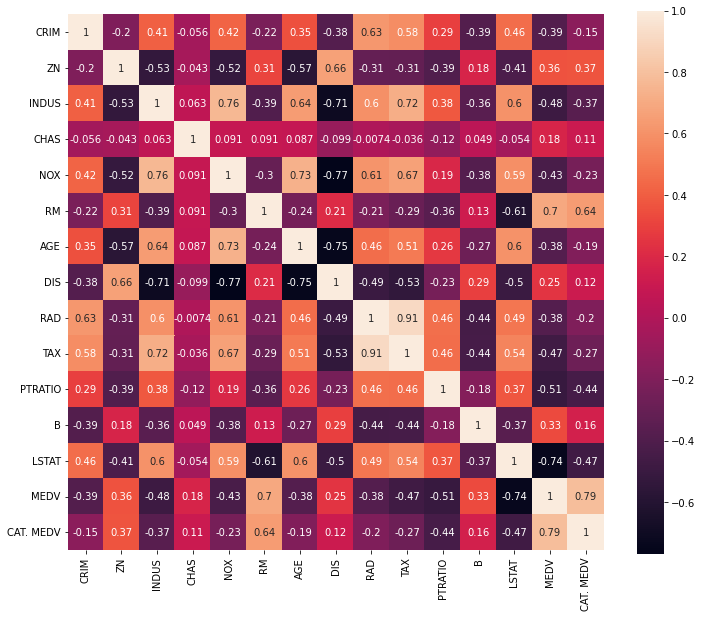

In [ ]:
# 상관계수에 대한 시각화

plt.figure(figsize=(12,10))
sns.heatmap(data=df.corr(), square=True, annot=True)
plt.show()


# CAT. MEDV 와 상관계수의 절대값이 0.2 이상인 Factor은 ZN, INDUS, NOX, RM, RAD, TAX, PTRATIO, LSTAT, MEDV
# 이중 MEDV를 제외한 TOP3는 RM(방의 수), LSTAT(하위 계층 비율), PTRATIO(학생-교사 비율)

가설 설정

목표 : 주택가격(MEDV)과 관련 있는 요소 찾기

1. 1인당 범죄율이 높을수록 주택가격은 낮을 것이다.
2. 비소매상업지역의 면적 비율이 높을수록 주택가격은 낮을 것이다.
3. 찰스강뷰인 주택가격은 높을 것이다.
4. 평수가 크고 방이 많을수록 주택가격은 높을 것이다.
5. 노후화 정도가 클수록 주택가격은 낮을 것이다.
6. 직장과 가까울수록 주택가격은 높을 것이다.
7. 학생-교사 비율이 높을수록 주택가격은 높을 것이다.


# 범죄율(CRIM)

1. 1인당 범죄율이 높을수록 주택가격은 낮을 것이다.

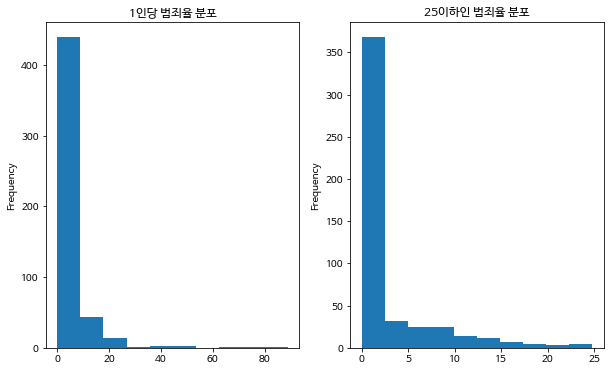

In [ ]:
plt.figure(figsize=(10,6))

plt.subplot(1,2,1)
df.CRIM.plot.hist()
plt.title('1인당 범죄율 분포')

plt.subplot(1,2,2)
df.loc[df['CRIM']<=25,'CRIM'].plot.hist()
plt.title('25이하인 범죄율 분포')

plt.show()

In [ ]:
# 범죄율이 25 초과인 경우는 11개로 제외하겠습니다.
df.loc[df['CRIM']>25,'CRIM'].count() 

11

In [ ]:
def func_cr(x) :
    if 0 < x <= 5 :
        return '보통'
    elif 5 < x <= 10 :
        return '조금높음' 
    elif 10 < x <= 15 :
        return '높음'
    elif 15 < x <= 20 :
        return '매우높음'
    elif 20 < x <= 25 :
        return '매우매우높음'

df['범죄율'] = df['CRIM'].map(func_cr)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT. MEDV,범죄율
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0,보통
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0,보통
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1,보통
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1,보통
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1,보통


In [ ]:
how = {
    'MEDV' : np.mean
}

df.groupby('범죄율').agg(how)

,MEDV
범죄율,
높음,14.533333
매우높음,12.016667
매우매우높음,10.071429
보통,24.491750
조금높음,18.048077


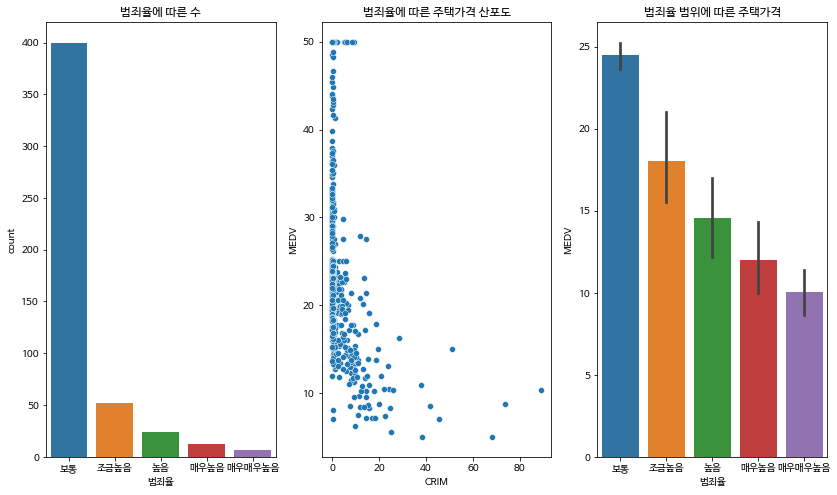

In [ ]:
plt.figure(figsize=(14,8))

plt.subplot(1,3,1)
sns.countplot(data=df, x='범죄율')
plt.title('범죄율에 따른 수')

plt.subplot(1,3,2)
sns.scatterplot(data=df, x='CRIM', y='MEDV')
plt.title('범죄율에 따른 주택가격 산포도')

plt.subplot(1,3,3)
sns.barplot(data=df, x='범죄율', y='MEDV')
plt.title('범죄율 범위에 따른 주택가격')

plt.show()

1인당 범죄율이 보통, 조금높음인 경우가 대부분이고,

1인당 범죄율이 높을수록 주택가격이 낮아진 것을 확인했습니다.

범죄율이 '보통'인 경우과 '매우매우높음'인 경우의 주택가격은 대략 2배정도 차이가 나는 것을 확인했습니다.

# 비소매상업지역(INDUS)

2. 비소매상업지역의 면적 비율이 높을수록 주택가격은 낮을 것이다.

Text(0.5, 1.0, '비소매면적 비율 분포')

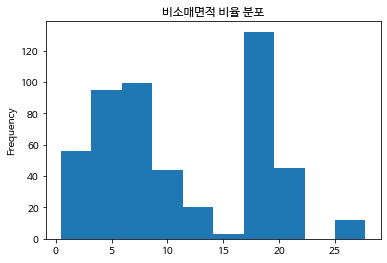

In [ ]:
df['INDUS'].plot.hist()
plt.title('비소매면적 비율 분포')

In [ ]:
def func_in(x) :
    if 0 < x <= 10 :
        return '보통'
    elif 10 < x <= 20 :
        return '높음'
    elif 20 < x :
        return '매우높음'

df['비소매면적'] = df['INDUS'].map(func_in)
df.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT. MEDV,범죄율,비소매면적
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0,보통,보통
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0,보통,보통
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1,보통,보통


In [ ]:
df.groupby('비소매면적').agg(how)

,MEDV
비소매면적,
높음,18.724402
매우높음,16.903704
보통,26.043704


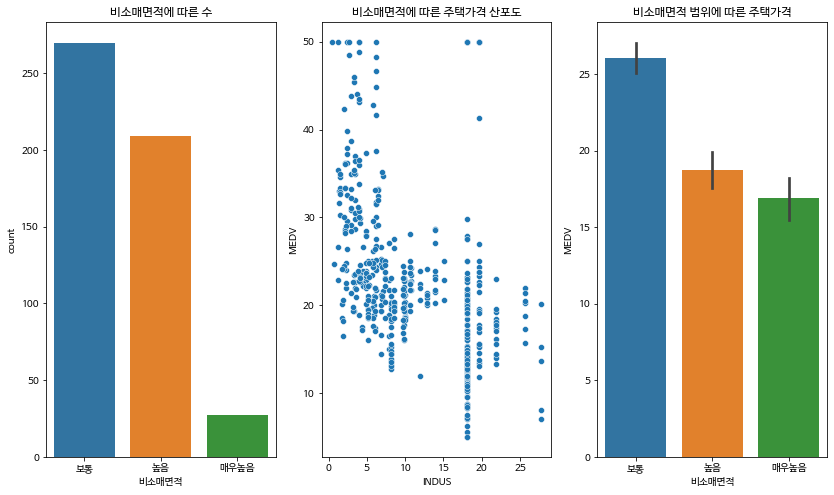

In [ ]:
plt.figure(figsize=(14,8))

plt.subplot(1,3,1)
sns.countplot(data=df, x='비소매면적')
plt.title('비소매면적에 따른 수')

plt.subplot(1,3,2)
sns.scatterplot(data=df, x='INDUS', y='MEDV')
plt.title('비소매면적에 따른 주택가격 산포도')

plt.subplot(1,3,3)
sns.barplot(data=df, x='비소매면적', y='MEDV')
plt.title('비소매면적 범위에 따른 주택가격')

plt.show()

비소매면적이 보통과 높음인 경우가 대부분이고, 

비소매면적 범위가 보통인 경우의 주택가격이 가장 높은 것을 확인했습니다.

따라서, 비소매면적 범위가 낮을수록 주택가격이 높다는 것을 추측할 수 있습니다.

# 찰스강뷰(CHAS)

3. 찰스강뷰인 주택가격은 높을 것이다.

In [ ]:
df.CHAS.unique()

array([0, 1])

In [ ]:
df.groupby('CHAS').agg(how)

,MEDV
CHAS,
0,22.093843
1,28.440000


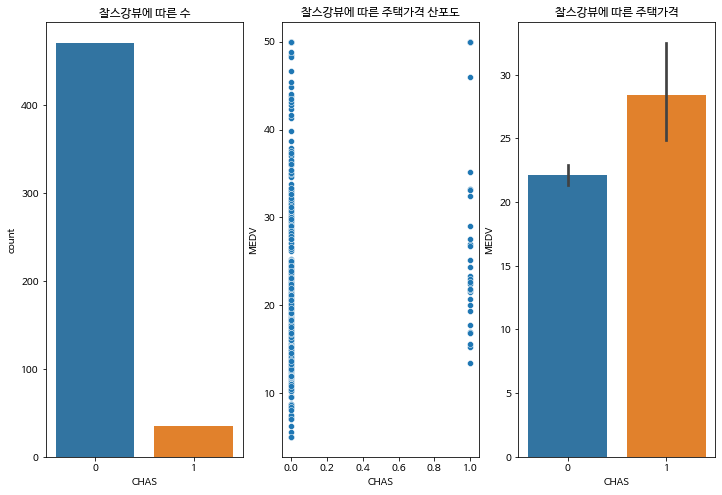

In [ ]:
plt.figure(figsize=(12,8))

plt.subplot(1,3,1)
sns.countplot(data=df, x='CHAS')
plt.title('찰스강뷰에 따른 수')

plt.subplot(1,3,2)
sns.scatterplot(data=df, x='CHAS', y='MEDV')
plt.title('찰스강뷰에 따른 주택가격 산포도')

plt.subplot(1,3,3)
sns.barplot(data=df, x='CHAS', y='MEDV')
plt.title('찰스강뷰에 따른 주택가격')


plt.show()

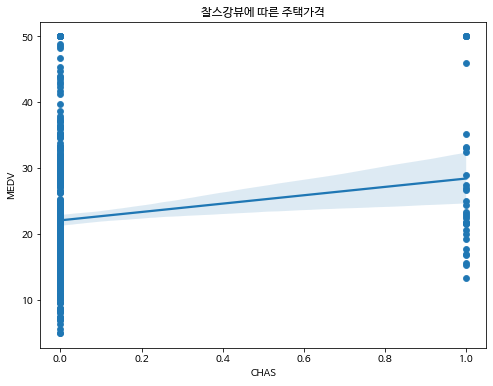

In [ ]:
plt.figure(figsize=(8,6))

plt.xlabel('CHAS')
plt.ylabel('MEDV')
sns.scatterplot(data=df, x='CHAS', y='MEDV')
sns.regplot(data=df, x='CHAS', y='MEDV') # 추세선
plt.title('찰스강뷰에 따른 주택가격')

plt.show()

찰스강의 경계에 위치하지 않은 경우가 대부분이고,

찰스강뷰에 따른 주택가격이 대략 6정도 차이가 나는 것을 보아, 찰스강뷰의 여부는 주택가격에 큰 영향을 준다고 볼 수 없다.

# 평수(ZN), 방의 수(RM)

4-1. 평수가 클수록 주택가격은 높을 것이다.

4-2. 방의 수가 많을수록 주택가격은 높을 것이다.

4-3. 평수가 크고 방의 수가 많을수록 주택가격은 높을 것이다.

In [ ]:
df.ZN.describe()

count    506.000000
mean      11.363636
std       23.322453
min        0.000000
25%        0.000000
50%        0.000000
75%       12.500000
max      100.000000
Name: ZN, dtype: float64

In [ ]:
df.loc[df['ZN']==0,'ZN'].count()

# 25000 평방피트를 초과하는 거주지역의 비율이 0인 곳이 372 = 이상치

372

In [ ]:
df.ZN.value_counts()

0.0      372
20.0      21
80.0      15
22.0      10
12.5      10
25.0      10
40.0       7
45.0       6
30.0       6
90.0       5
95.0       4
60.0       4
21.0       4
33.0       4
55.0       3
70.0       3
34.0       3
52.5       3
35.0       3
28.0       3
75.0       3
82.5       2
85.0       2
17.5       1
100.0      1
18.0       1
Name: ZN, dtype: int64

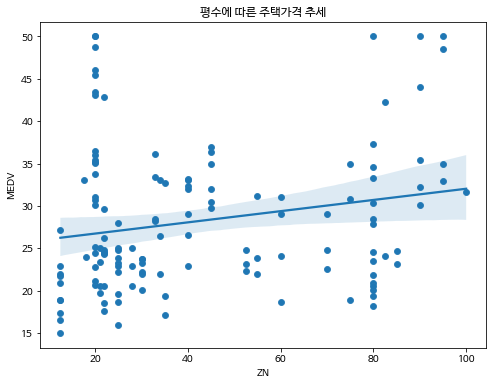

In [ ]:
# 그룹스터디 신재하 조원님의 프로젝트를 참고하여 적은 코드입니다.

plt.figure(figsize=(8,6))

plt.xlabel('ZN')
plt.ylabel('MEDV')
cond = df['ZN'] != 0 # 25000 평방비트를 초과하는 거주지역의 비율의 값이 0인 것을 제외
x = df.loc[cond,'ZN']
y = df['MEDV'][x.index]
sns.scatterplot(data=df, x=x, y=y)
sns.regplot(data=df, x=x, y=y)
plt.title('평수에 따른 주택가격 추세')

plt.show()

ZN과 주택가격이 우상향하는 것을 보아, 평수가 클수록 주택가격은 비례하는 것을 알 수 있습니다.



In [ ]:
df.RM.unique() # 이상치 없음을 확인합니다.

array([6.575, 6.421, 7.185, 6.998, 7.147, 6.43 , 6.012, 6.172, 5.631,
       6.004, 6.377, 6.009, 5.889, 5.949, 6.096, 5.834, 5.935, 5.99 ,
       5.456, 5.727, 5.57 , 5.965, 6.142, 5.813, 5.924, 5.599, 6.047,
       6.495, 6.674, 5.713, 6.072, 5.95 , 5.701, 5.933, 5.841, 5.85 ,
       5.966, 6.595, 7.024, 6.77 , 6.169, 6.211, 6.069, 5.682, 5.786,
       6.03 , 5.399, 5.602, 5.963, 6.115, 6.511, 5.998, 5.888, 7.249,
       6.383, 6.816, 6.145, 5.927, 5.741, 6.456, 6.762, 7.104, 6.29 ,
       5.787, 5.878, 5.594, 5.885, 6.417, 5.961, 6.065, 6.245, 6.273,
       6.286, 6.279, 6.14 , 6.232, 5.874, 6.727, 6.619, 6.302, 6.167,
       6.389, 6.63 , 6.015, 6.121, 7.007, 7.079, 6.405, 6.442, 6.249,
       6.625, 6.163, 8.069, 7.82 , 7.416, 6.781, 6.137, 5.851, 5.836,
       6.127, 6.474, 6.229, 6.195, 6.715, 5.913, 6.092, 6.254, 5.928,
       6.176, 6.021, 5.872, 5.731, 5.87 , 5.856, 5.879, 5.986, 5.613,
       5.693, 6.431, 5.637, 6.458, 6.326, 6.372, 5.822, 5.757, 6.335,
       5.942, 6.454,

In [ ]:
df.RM.describe()

count    506.000000
mean       6.284634
std        0.702617
min        3.561000
25%        5.885500
50%        6.208500
75%        6.623500
max        8.780000
Name: RM, dtype: float64

Text(0.5, 1.0, '방의 수에 따른 분포')

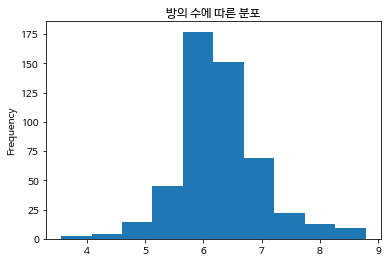

In [ ]:
df.RM.plot.hist()
plt.title('방의 수에 따른 분포')

In [ ]:
def func_rm(x) :
    if 0 < x < 5.8 :
        return '적음'
    elif 5.8 <= x < 6.7 :
        return '보통'
    elif 6.7 <= x :
        return '많음'

df['방 개수'] = df['RM'].map(func_rm)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT. MEDV,범죄율,비소매면적,방 개수
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0,보통,보통,보통
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0,보통,보통,보통
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1,보통,보통,많음
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1,보통,보통,많음
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1,보통,보통,많음


In [ ]:
df.groupby('방 개수').agg(how)

,MEDV
방 개수,
많음,33.389286
보통,20.400664
적음,16.359140


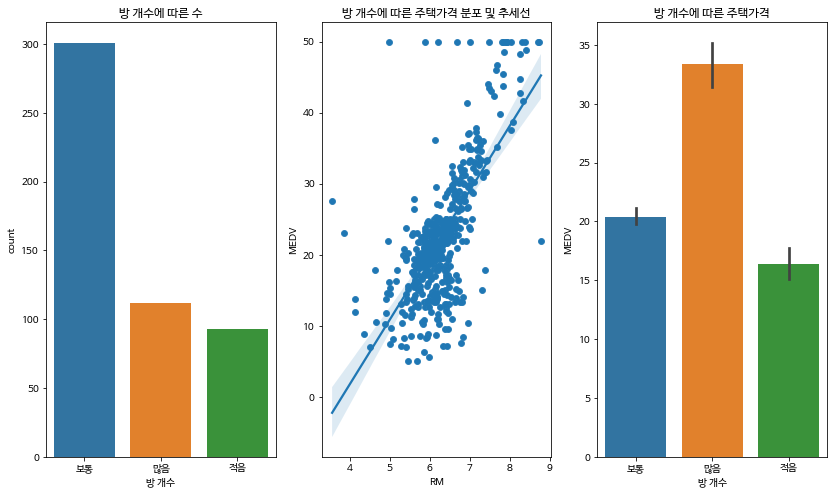

In [ ]:
plt.figure(figsize=(14,8))

plt.subplot(1,3,1)
sns.countplot(data=df, x='방 개수')
plt.title('방 개수에 따른 수')

plt.subplot(1,3,2)
sns.scatterplot(data=df, x='RM', y='MEDV')
sns.regplot(data=df, x='RM', y='MEDV')
plt.title('방 개수에 따른 주택가격 분포 및 추세선')

plt.subplot(1,3,3)
sns.barplot(data=df, x='방 개수', y='MEDV')
plt.title('방 개수에 따른 주택가격')

plt.show()

방 개수가 보통인 경우가 가장 많았고,

방 개수와 주택가격의 추세선이 우상향하는 것을 보아, 방 개수와 주택가격은 비례한다고 볼 수 있습니다.

방 개수가 많은 경우의 주택가격이 가장 높은 것을 확인했습니다.

'평수가 크고, 방이 많을수록 주택가격이 높을 것'이라는 가설 확인해보겠습니다.

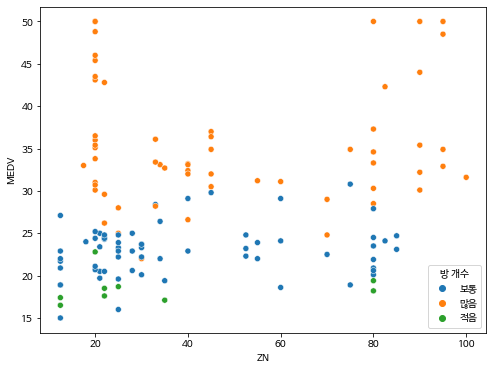

In [ ]:
plt.figure(figsize=(8,6))

cond = df['ZN'] != 0
x = df.loc[cond,'ZN']
y = df['MEDV'][x.index]
sns.scatterplot(data=df, x=x, y=y, hue = '방 개수')

plt.show()

평수가 크고 방 개수가 많을수록 주택가격이 비싸다는 것을 확인했습니다.


# 노후화 정도(AGE)

5. 노후화 정도가 클수록 주택가격은 낮을 것이다.

In [ ]:
df.AGE.value_counts() # 이상치 없음을 확인

100.0    43
95.4      4
96.0      4
98.2      4
97.9      4
         ..
58.4      1
74.4      1
73.4      1
33.1      1
89.3      1
Name: AGE, Length: 356, dtype: int64

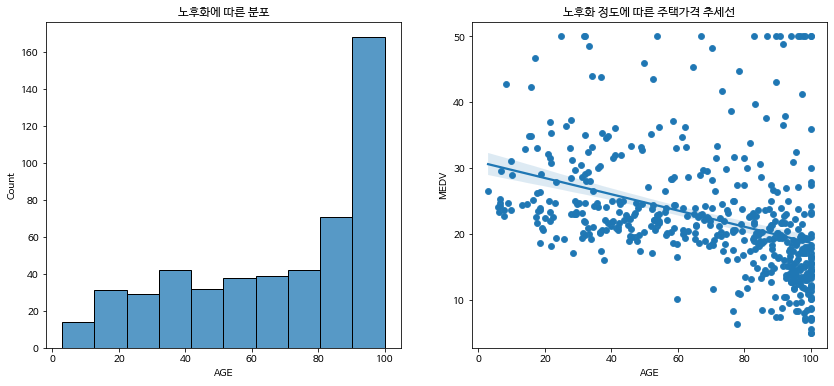

In [ ]:
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
sns.histplot(data=df, x='AGE')
plt.title('노후화에 따른 분포')

plt.subplot(1,2,2)
sns.scatterplot(data=df, x='AGE', y='MEDV')
sns.regplot(data=df, x='AGE', y='MEDV')
plt.title('노후화 정도에 따른 주택가격 추세선')

plt.show()

노후화 비율이 클수록 주택가격이 하락하는 우하향 추세선을 보아, 

노후화 정도가 클수록 주택가격이 낮다는 것을 확인했습니다.

# 직업센터까지의 접근성 지수(DIS)

6. 직장과 가까울수록 주택가격은 높을 것이다.

In [ ]:
df.DIS.value_counts()

3.4952    5
5.7209    4
5.2873    4
6.8147    4
5.4007    4
         ..
2.4220    1
2.1620    1
2.0407    1
1.9709    1
2.5050    1
Name: DIS, Length: 412, dtype: int64

In [ ]:
df.DIS.describe()

count    506.000000
mean       3.795043
std        2.105710
min        1.129600
25%        2.100175
50%        3.207450
75%        5.188425
max       12.126500
Name: DIS, dtype: float64

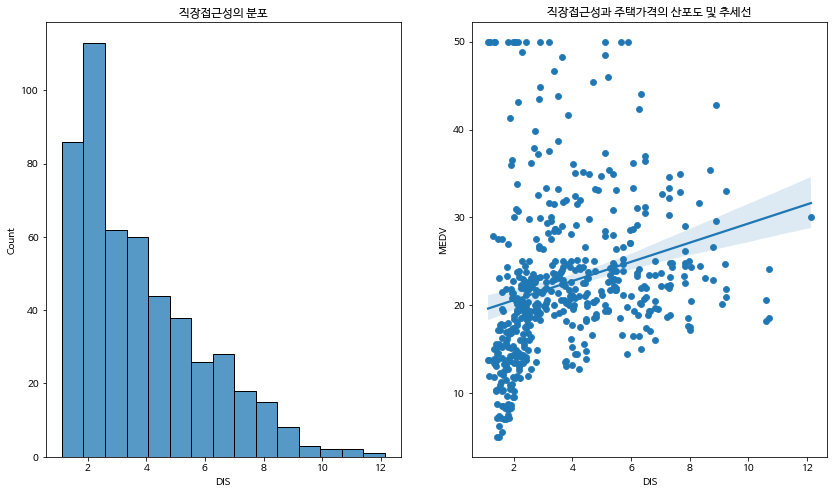

In [ ]:
plt.figure(figsize=(14,8))

plt.subplot(1,2,1)
sns.histplot(data=df, x='DIS')
plt.title('직장접근성의 분포')

plt.subplot(1,2,2)
sns.scatterplot(data=df, x='DIS', y='MEDV')
sns.regplot(data=df, x='DIS', y='MEDV')
plt.title('직장접근성과 주택가격의 산포도 및 추세선')

plt.show()

직장접근성이 5미만인 경우가 대부분이고,

직장접근성과 주택가격의 추세선이 우상향하는 것을 보아, 직장접근성이 높을수록 주택가격이 높다는 것을 확인했습니다.

# 학생-교사 비율(PTRATIO)

7. 학생-교사 비율이 높을수록 주택가격은 높을 것이다.

In [ ]:
df.PTRATIO.unique() # 이상치 없는 것을 확인했습니다.

array([15.3, 17.8, 18.7, 15.2, 21. , 19.2, 18.3, 17.9, 16.8, 21.1, 17.3,
       15.1, 19.7, 18.6, 16.1, 18.9, 19. , 18.5, 18.2, 18. , 20.9, 19.1,
       21.2, 14.7, 16.6, 15.6, 14.4, 12.6, 17. , 16.4, 17.4, 15.9, 13. ,
       17.6, 14.9, 13.6, 16. , 14.8, 18.4, 19.6, 16.9, 20.2, 15.5, 18.8,
       22. , 20.1])

In [ ]:
df.PTRATIO.describe()

count    506.000000
mean      18.455534
std        2.164946
min       12.600000
25%       17.400000
50%       19.050000
75%       20.200000
max       22.000000
Name: PTRATIO, dtype: float64

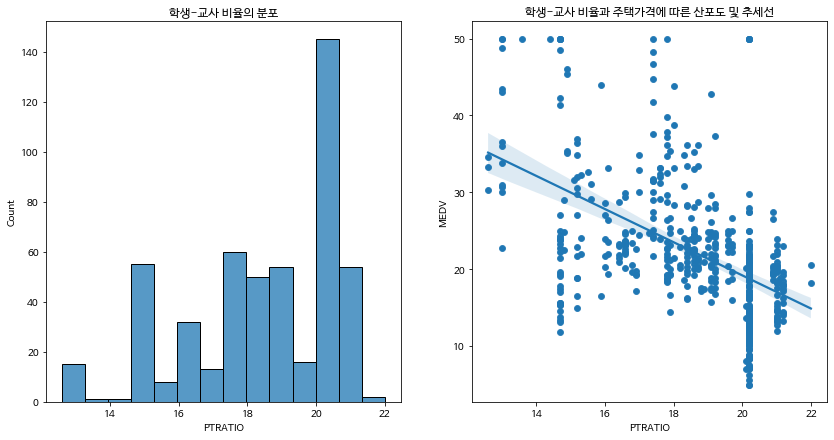

In [ ]:
plt.figure(figsize=(14,7))

plt.subplot(1,2,1)
sns.histplot(data=df, x='PTRATIO')
plt.title('학생-교사 비율의 분포')

plt.subplot(1,2,2)
sns.scatterplot(data=df, x='PTRATIO', y='MEDV')
sns.regplot(data=df, x='PTRATIO', y='MEDV')
plt.title('학생-교사 비율과 주택가격에 따른 산포도 및 추세선')

plt.show()

학생-교사 비율의 평균은 18.4고,

학생-교사 비율과 주택가격의 추세선이 우하향하는 것을 보아, 

학생-교사 비율이 높을수록 주택가격이 낮아짐을 확인했습니다.

# 직장이 가까우면서(DIS) 소형 평수(ZN)인 부동산의 가격은?  약 $20973 입니다.

추측 : 직장이 가까울수록, 소형 평수일수록 주택가격은 낮을 것이다.

In [ ]:
df.ZN.value_counts()

# 평수가 0인 값 372개 즉, 이상치 372개

0.0      372
20.0      21
80.0      15
22.0      10
12.5      10
25.0      10
40.0       7
45.0       6
30.0       6
90.0       5
95.0       4
60.0       4
21.0       4
33.0       4
55.0       3
70.0       3
34.0       3
52.5       3
35.0       3
28.0       3
75.0       3
82.5       2
85.0       2
17.5       1
100.0      1
18.0       1
Name: ZN, dtype: int64

In [ ]:
df.DIS.value_counts() # 이상치 없음을 확인합니다.

3.4952    5
5.7209    4
5.2873    4
6.8147    4
5.4007    4
         ..
2.4220    1
2.1620    1
2.0407    1
1.9709    1
2.5050    1
Name: DIS, Length: 412, dtype: int64

In [ ]:
df.groupby([df.loc[df['ZN']!=0, 'ZN'], 'DIS']).agg(how)

MEDV
ZN    DIS           
12.5  5.4509   21.70
      5.5605   22.90
      5.9505   27.10
      6.0821   16.50
      6.2267   18.90
...              ...
90.0  8.6966   35.40
      12.1265  30.10
95.0  5.1180   49.25
      7.6534   33.90
100.0 8.3248   31.60

[91 rows x 1 columns]

In [ ]:
직장평균 = df.DIS.mean()

def func_dis(x) :
    if x > 직장평균 :
        return '멀다'
    else :
        return '가깝다'

df['직장근접'] = df['DIS'].map(func_dis)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT. MEDV,범죄율,비소매면적,방 개수,직장근접
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0,보통,보통,보통,멀다
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0,보통,보통,보통,멀다
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1,보통,보통,많음,멀다
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1,보통,보통,많음,멀다
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1,보통,보통,많음,멀다


In [ ]:
cond = df['ZN'] > 0
평수평균 = df.loc[cond, 'ZN'].mean()

def func_zn(x) :
    if x > 평수평균 :
        return '대형'
    else :
        return '소형'

df['평수크기'] = df['ZN'].map(func_zn)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT. MEDV,범죄율,비소매면적,방 개수,직장근접,평수크기
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0,보통,보통,보통,멀다,소형
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0,보통,보통,보통,멀다,소형
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1,보통,보통,많음,멀다,소형
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1,보통,보통,많음,멀다,소형
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1,보통,보통,많음,멀다,소형


In [ ]:
직장평수평균 = df.groupby(['직장근접', '평수크기']).agg(how)
직장평수평균

MEDV
직장근접 평수크기           
가깝다  대형    32.000000
     소형    20.972727
멀다   대형    29.892000
     소형    23.076582

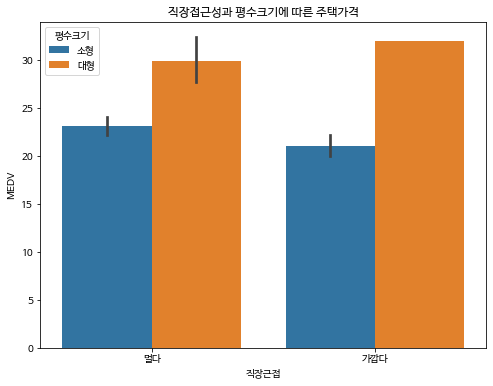

In [ ]:
plt.figure(figsize=(8,6))

sns.barplot(data=df, x='직장근접', y='MEDV', hue='평수크기')
plt.title('직장접근성과 평수크기에 따른 주택가격')
plt.show()

In [ ]:
a = round(직장평수평균['MEDV'].loc['가깝다','대형']*1000)
print(f'직장이 가까우면서 대형 평수인 주택들의 평균 가격은 약 ${a}입니다.')

b = round(직장평수평균['MEDV'].loc['가깝다', '소형']*1000)
print(f'직장이 가까우면서 소형 평수인 주택들의 평균 가격은 약 ${b}입니다.')

c = round(직장평수평균['MEDV'].loc['멀다', '대형']*1000)
print(f'직장이 멀면서 대형 평수인 주택들의 평균 가격은 약 ${c}입니다.')

d = round(직장평수평균['MEDV'].loc['멀다', '소형']*1000)
print(f'직장이 멀면서 소형 평수인 주택들의 평균 가격은 약 ${d}입니다.')

직장이 가까우면서 대형 평수인 주택들의 평균 가격은 약 $32000입니다.
직장이 가까우면서 소형 평수인 주택들의 평균 가격은 약 $20973입니다.
직장이 멀면서 대형 평수인 주택들의 평균 가격은 약 $29892입니다.
직장이 멀면서 소형 평수인 주택들의 평균 가격은 약 $23077입니다.


직장이 가까우면서 대형 평수인 주택 평균가격이 가장 높고, 

직장이 가까우면서 소형 평수인 주택 평균가격이 가장 낮은 것을 확인했습니다.

<div class="alert alert-block alert-success">
<b>채점기준</b> <br>
<ul>
    <li>데이터를 3건이 상의 변수를 분석했는가? </li>
    <li>데이터를 분류한 기준을 논리적으로 정리했는가</li>       
    <li>데이터를 차트로 시각화했는가? </li>
    <li>결과를 분석해서 정리했는가? </li>       
    <li>심도있게 분석했는가? </li>     
</div>